In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.metrics import r2_score
np.set_printoptions(suppress=True)

# 年份
year = [i for i in range(2001,2018)]

In [2]:
# 输入数据文件名和表名
# 返回成分占比，特征向量，数据，列名
def Get_Data_of_PCA(sheet_file,sheet_name):
    # 获取数据
    df=pd.read_excel(sheet_file,sheet_name=sheet_name)
    data = df.values[:,1:]
    name = df.columns.values.tolist()[1:]

    # 数据主成分分析 
    pca = PCA()
    pca.fit(data)
    pca.transform(data)
    # 占比
    pca_pre = pca.explained_variance_ratio_
    # 特征向量
    pca_com = pca.components_

    # 展示内容
    print('每个成分各自方差百分比：',pca_pre)
    print('\n特征向量：',pca_com.shape)
    print(pca_com)

    plt.title('Scree plot')
    plt.ylabel('Percent')
    plt.plot(pca_pre,'b-o')
    plt.show()
    
    return name,data,pca_pre,pca_com

In [3]:
# 输入数据和降维维度
# 返回降维数据
def Get_Dim_Data(data,num):
    # 降维数据
    pca = PCA(num)
    pca.fit(data)
    dim_low = pca.transform(data)

    # 展示降维数据
    print('成分降维数据：',dim_low.tolist())
    for i in range(len(dim_low[0])):
        plt.plot(year,dim_low[:,i],'g-1')
    plt.show()
    
    return dim_low

In [4]:
# 输入x，y值以及方程最高次数
# 返回系数，函数以及拟合 Y 数值
def Get_Function(x,y,num,flag=0):
    # 数组一维化
    x = x.flatten()
    y = y.flatten()
    
    coe = np.polyfit(x,y,num)
    fun = np.poly1d(coe)
    print(num,'次多项式拟合系数：',coe)
    print(num,'次多项式拟合函数：\n',fun)
    
    y_val = fun(x)
    print('决定系数 R^2：',r2_score(y, y_val))
    
    # 绘图
    line, = plt.plot(x, y, 'b''o')
    line_val, = plt.plot(x, y_val, 'r-1')
    
    plt.legend([line, line_val], ['ture data', 'fitting data'])
    if flag==1:
        plt.title('Data plot')
        plt.xlabel('economic')
        plt.ylabel('pollution')
    plt.show()
    
    return coe,fun,y_val

In [5]:
# --------------------------------- 经济数据 ---------------------------------

每个成分各自方差百分比： [0.99189355 0.00697562 0.00086643 0.00025537 0.0000089  0.00000013
 0.        ]

特征向量： (7, 7)
[[ 0.00051793 -0.00036053  0.12482609  0.18582164  0.9594079   0.10537816
   0.13535248]
 [ 0.00047277  0.00742514  0.48560352  0.184854   -0.24366129  0.39794994
   0.71570098]
 [-0.00186186  0.00747532  0.35719136 -0.87500126  0.12709227 -0.25083328
   0.16630693]
 [ 0.00049836 -0.02551755 -0.78299138 -0.28630687  0.06139255  0.24066763
   0.49255612]
 [-0.00288736 -0.02222849 -0.0845939   0.28927626 -0.01543427 -0.84231619
   0.44601109]
 [ 0.01627364 -0.99923993  0.02811353 -0.00437538 -0.00243334  0.01357777
  -0.01596701]
 [-0.9998613  -0.01622265 -0.00005927  0.00076374  0.00018067  0.00348319
  -0.0012035 ]]


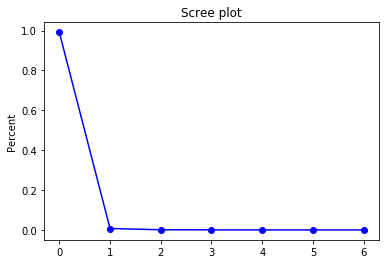

经济影响因素： ['人均GDP（万元）', '农业总产值（万元）', '固定资产投资额（万元）', '社会消费品零售额（万元）', '工业总产值（万元）', '财政收入（万元）', '财政支出（万元）']


In [6]:
# 经济数据列名，数据，各成分占比，特征向量
eco_name,eco_data,eco_pre,eco_com = Get_Data_of_PCA('深圳市数据.xls','economic_factor')

print('经济影响因素：',eco_name)

成分降维数据： [[-138237766.90129527], [-128862236.75893508], [-108000431.74302219], [-90276590.65629938], [-74200562.85635796], [-53401546.7547991], [-32453696.82650668], [-12878191.837340323], [-16166757.969391804], [14800489.795069538], [39559299.870759286], [50841833.75815643], [69048504.77034931], [88065978.69668727], [99145631.30725043], [121013051.839107], [172002992.26656833]]


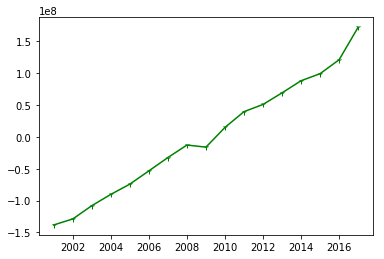

In [7]:
# 经济数据降维结果
eco_dim = Get_Dim_Data(eco_data,1)

In [8]:
# --------------------------------- 污染数据 ---------------------------------

每个成分各自方差百分比： [0.99970807 0.00026174 0.00002398 0.00000364 0.00000257]

特征向量： (5, 5)
[[ 0.00284256  0.00373678  0.00336526 -0.01209521  0.99991016]
 [ 0.03754067  0.0749625   0.03951858 -0.99561628 -0.01256313]
 [-0.30439786 -0.80860137 -0.4949854  -0.09206255  0.00443947]
 [ 0.90331058 -0.08386647 -0.42056338  0.01106133 -0.00070529]
 [ 0.29992424 -0.57749191  0.75930419 -0.0020171  -0.00127436]]


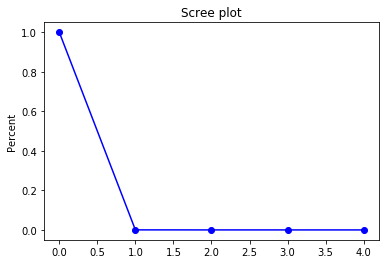

污染影响因素： ['二氧化硫日均量(ug/m3)', '二氧化氮日均量(ug/m3)', '可吸入颗粒物日均量(ug/m3)', '工业固体废物产生量（万吨）', '工业烟粉尘排放量（吨）']


In [9]:
# 污染数据列名，数据，各成分占比，特征向量
pol_name,pol_data,pol_pre,pol_com = Get_Data_of_PCA('深圳市数据.xls','pollution_factor')

print('污染影响因素：',pol_name)

成分降维数据： [[574.0738568570587], [1383.9577509631042], [2148.752916394255], [3337.4344802581018], [3564.2174308180274], [1124.8988579029508], [357.6027467791704], [1140.457816291799], [602.4145136651339], [-1233.8895338697437], [-1649.403457683107], [-2076.01418094308], [-2150.6156536374688], [-2175.1507633806], [-1765.5482460054816], [-1183.5457791275244], [-1999.642755282594]]


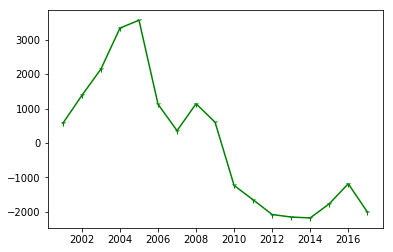

In [10]:
# 污染数据降维结果
pol_dim = Get_Dim_Data(pol_data,1)

In [11]:
# --------------------------------- 经济与环境组合数据展示 ---------------------------------

各年份环境与经济降维数据：



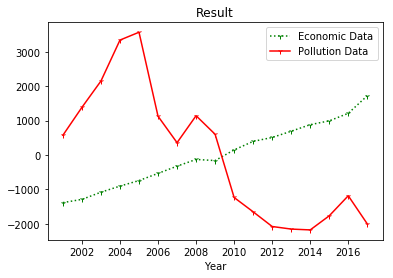

污染数据与经济数据相关图像：



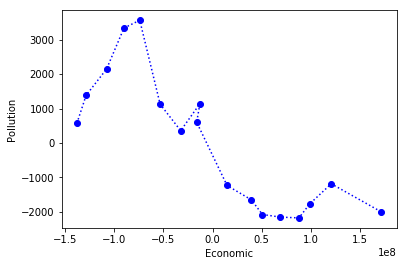

In [12]:
print('各年份环境与经济降维数据：\n')
plt.title('Result')
plt.plot(year,eco_dim[:,0]/(10**5),'g:1',label='Economic Data')
plt.plot(year,pol_dim[:,0],'r-1',label='Pollution Data')
plt.legend()
plt.xlabel('Year')
plt.show()

print('污染数据与经济数据相关图像：\n')
plt.plot(eco_dim[:,0], pol_dim[:,0], 'b:o')
plt.ylabel('Pollution')
plt.xlabel('Economic')
plt.show()

In [13]:
# 综合得分表
eco_score = eco_dim.flatten()
pol_score = pol_dim.flatten()

# 离差标准化主成分得分
eco_score = ((eco_dim - np.min(eco_dim))/(np.max(eco_dim)- np.min(eco_dim)))
pol_score = ((pol_dim - np.min(pol_dim))/(np.max(pol_dim)- np.min(pol_dim)))

total_score = pd.DataFrame(np.hstack((eco_score,pol_score)),columns=['economic score','pollution score'])
print('综合得分表：')
print(total_score)

综合得分表：
    economic score  pollution score
0         0.000000         0.479012
1         0.030220         0.620122
2         0.097464         0.753376
3         0.154593         0.960486
4         0.206411         1.000000
5         0.273453         0.574985
6         0.340974         0.441295
7         0.404072         0.577696
8         0.393472         0.483950
9         0.493289         0.164001
10        0.573094         0.091604
11        0.609461         0.017273
12        0.668146         0.004275
13        0.729446         0.000000
14        0.765159         0.071367
15        0.835644         0.172772
16        1.000000         0.030580



经济对环境拟合：

1 次多项式拟合系数： [-0.72015882  0.71851366]
1 次多项式拟合函数：
  
-0.7202 x + 0.7185
决定系数 R^2： 0.6690723987863133


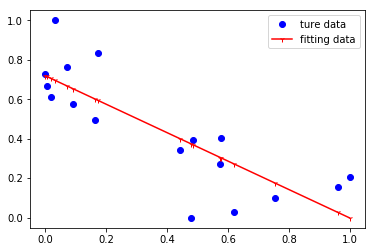

环境对经济拟合：

1 次多项式拟合系数： [-0.92906228  0.79296148]
1 次多项式拟合函数：
  
-0.9291 x + 0.793
决定系数 R^2： 0.6690723987863133


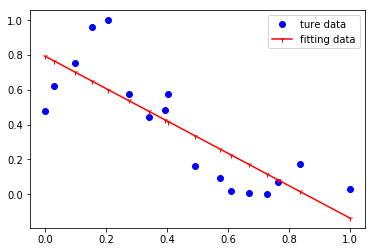

In [14]:
# 经济增长综合效益函数
#print('\n经济增长综合效益函数：')
#_,_,_ = Get_Function(np.array([i for i in range(1,18)]),eco_score,1)
# 环境污染综合效益函数
#print('环境污染综合效益函数:')
#_,_,_ = Get_Function(np.array([i for i in range(1,18)]),pol_score,1)

score = np.hstack((eco_score,pol_score))
# 经济对环境拟合
fit_data = score[np.argsort(score[:,1]),:]
print('\n经济对环境拟合：\n')
_,_,_ = Get_Function(fit_data[:,1],fit_data[:,0],1)

# 环境对经济拟合
fit_data = score[np.argsort(score[:,0]),:]
print('环境对经济拟合：\n')
_,_,_ = Get_Function(fit_data[:,0],fit_data[:,1],1)
# 决定系数 R^2： 0.8320725753302713

In [15]:
# --------------------------------- EKC曲线数据拟合 ---------------------------------

全数据拟合:

1 次多项式拟合系数： [-0.92906228  0.79296148]
1 次多项式拟合函数：
  
-0.9291 x + 0.793
决定系数 R^2： 0.6690723987863133


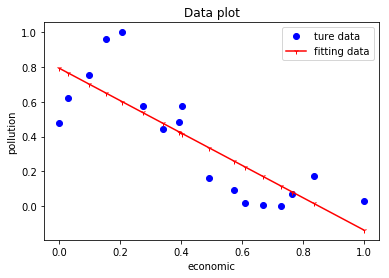

In [16]:
# 一次多项式拟合
num = 1
# 全数据拟合
print('全数据拟合:\n')
coe,fun,y_val = Get_Function(eco_score,pol_score,num,1)

全数据拟合:

2 次多项式拟合系数： [ 0.14744317 -1.06626628  0.81253947]
2 次多项式拟合函数：
         2
0.1474 x - 1.066 x + 0.8125
决定系数 R^2： 0.6704183876717156


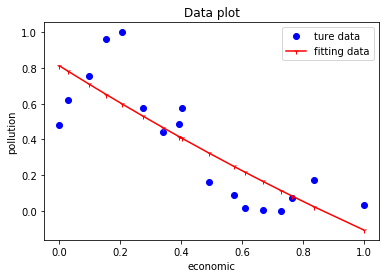

去除异常数据拟合:

2 次多项式拟合系数： [-3.33087709  1.02529449  0.64590909]
2 次多项式拟合函数：
         2
-3.331 x + 1.025 x + 0.6459
决定系数 R^2： 0.791127394755221


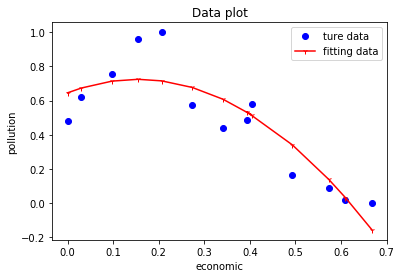

In [17]:
# 二次多项式拟合
num = 2
# 全数据拟合
print('全数据拟合:\n')
coe,fun,y_val = Get_Function(eco_score,pol_score,num,1)
# 去除特殊数据拟合
print('去除异常数据拟合:\n')
coe,fun,y_val = Get_Function(eco_score[:-4],pol_score[:-4],num,1)

全数据拟合:

3 次多项式拟合系数： [ 5.68114638 -8.21891522  2.10018246  0.60579751]
3 次多项式拟合函数：
        3         2
5.681 x - 8.219 x + 2.1 x + 0.6058
决定系数 R^2： 0.8320725753302715


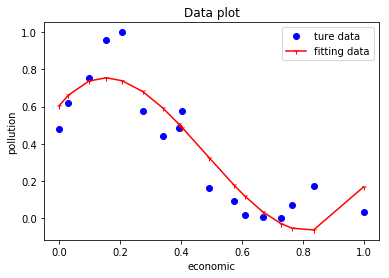

去除异常数据拟合:

3 次多项式拟合系数： [ 16.36092391 -19.608268     5.10644241   0.48664651]
3 次多项式拟合函数：
        3         2
16.36 x - 19.61 x + 5.106 x + 0.4866
决定系数 R^2： 0.910809712385039


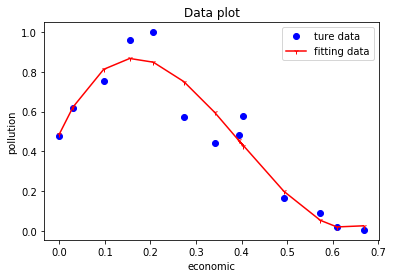

In [18]:
# 三次多项式拟合
num = 3
# 全数据拟合
print('全数据拟合:\n')
coe,fun,y_val = Get_Function(eco_score,pol_score,num,1)

# 去除异常数据拟合
print('去除异常数据拟合:\n')
coe,fun,y_val = Get_Function(eco_score[:-4],pol_score[:-4],num,1)

3 次多项式拟合系数： [ 5.68114638 -8.21891522  2.10018246  0.60579751]
3 次多项式拟合函数：
        3         2
5.681 x - 8.219 x + 2.1 x + 0.6058
决定系数 R^2： 0.8320725753302715


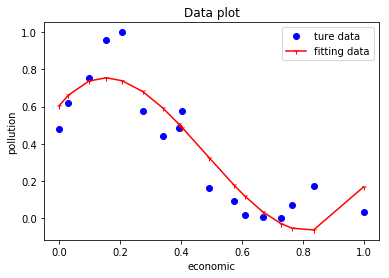

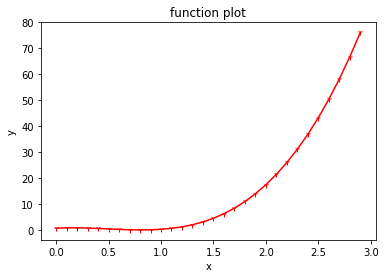

In [19]:
coe,fun,y_val = Get_Function(eco_score,pol_score,num,1)

y_val=fun([i/10 for i in range(0,30)])
plt.plot([i/10 for i in range(0,30)],y_val,'r-1')
plt.title('function plot')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [28]:
df=pd.read_excel('深圳市数据.xls','architecture')
arc_data = df.values[:,1:]

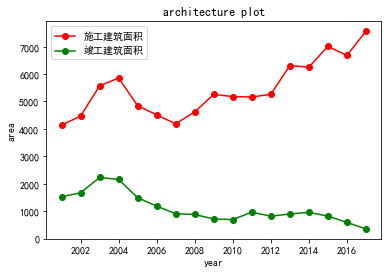

In [36]:
from pylab import mpl
mpl.rcParams['font.sans-serif'] = ['SimHei']

line1,=plt.plot(year,arc_data[:,0:1],'r-o')
line2,=plt.plot(year,arc_data[:,1:],'g-o')
plt.legend([line1, line2], [u'施工建筑面积',u'竣工建筑面积'])
plt.title('architecture plot')
plt.xlabel('year')
plt.ylabel('area')
plt.show()